<a href="https://colab.research.google.com/github/codewithalishakhan/Zomato_Restaurant_Analysis/blob/main/ZOMATO_RESTAURANT_ANALYSIS_ML(8)_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Project Name**    -  Zomato Restaurant Clustering And Sentiment Analysis.



##### **Project Type**    - Unsupervised Machine Learning
##### **Contribution**    - Individual
Name - **Alisha Khan**

Cohort - **Nairobi**



  


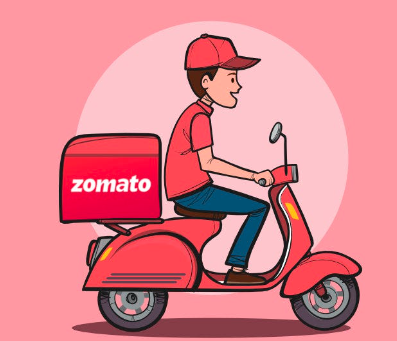

# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by **Deepinder Goyal** and **Pankaj Chaddah** in 2008.
This project analyzes Zomato's restaurant data for customer sentiments and company growth. Through sentiment analysis and restaurant segmentation, it derives actionable insights and addresses key business cases. Utilizing customer reviews and metadata, the project aims to enhance the dining experience and identify areas for improvement. Visualizations aid in understanding customer preferences and clustering restaurants for strategic decision-making. Ultimately, the project facilitates both customer satisfaction and company development within the diverse Indian food industry.


# **GitHub Link -**

https://github.com/codewithalishakhan/Zomato_Restaurant_Analysis



# **Problem Statement**



The challenge is to effectively analyze Zomato's restaurant data to understand customer sentiments, segment restaurants, and address business cases. This entails deriving actionable insights from reviews, clustering restaurants for strategic decisions, and enhancing overall service quality. The goal is to facilitate informed decision-making for consumers and faster growth opportunities for businesses in the dynamic Indian food industry landscape.




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.metrics import silhouette_samples, silhouette_score
pd.set_option('display.max_columns',None)

# Anomly Detection Tools
from sklearn.ensemble import IsolationForest

import warnings
warnings .filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
# from google.colab import drive
# drive .mount ('/content/drive')

restaurant_df = pd.read_csv('/content/Zomato Restaurant names and Metadata.csv')
restaurant_df


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [4]:
review_df  = pd.read_csv("/content/Zomato Restaurant reviews.csv")
review_df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


### Dataset First View

In [5]:
# Dataset First Look
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [7]:
restaurant_df.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [8]:
review_df.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


### Dataset Rows & Columns count

In [9]:
# Dataset Rows & Columns count in Restaurant Dataset
print(f' The number of Rows and Columns in the  Restaurant Dataset {restaurant_df.shape}')

 The number of Rows and Columns in the  Restaurant Dataset (105, 6)


In [10]:
# Dataset Row & Columns count in Review Dataset
print(f'The number of Rows and Columns in the Review Dataset {review_df.shape}')

The number of Rows and Columns in the Review Dataset (10000, 7)


### Dataset Information

**All the Variables present in Zomato Restaurant names and Metadata**

Name : Name of Restaurants

Links : URL Links of Restaurants

Cost : Per person estimated Cost for Dinning

Collection : Tagging of Restaurants w.r.t. Zomato categories

Cuisines : Cuisines(Type of food) served by Restaurants

Timings : Restaurant Timings



**All the Variables present in Zomato Review Dataset**



Restaurant : Name of the Restaurant

Reviewer : Name of the Reviewer

Review : Review Text

Rating : Rating Provided by Reviewer

MetaData : Reviewer Metadata - No. of Reviews and followers

Time: Date and Time of Review

Pictures : No. of pictures posted with review



In [11]:
# Dataset Information of Restaurants
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [12]:
# Dataset Information of Review
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count restaurant columns
print(f'Number of duplicate item present in Restaurant dataset =  {restaurant_df.duplicated().sum()} \n')

Number of duplicate item present in Restaurant dataset =  0 



In [14]:
# Dataset Duplicate Values Count review columns
print(f'Number of duplicate item present in Review dataset = {review_df.duplicated().sum()}')

Number of duplicate item present in Review dataset = 36


#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values
print('---Null values present  in the Restaurant dataset---')
print(restaurant_df.isnull().sum(), '\n')

---Null values present  in the Restaurant dataset---
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64 



In [16]:
# Missing Values/Null Values Count
print('---Null values present int the Restaurant dataset---')
print(review_df.isnull().sum())

---Null values present int the Restaurant dataset---
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Text(0.5, 1.0, 'All the Missing values present in Restaurant columns are \n')

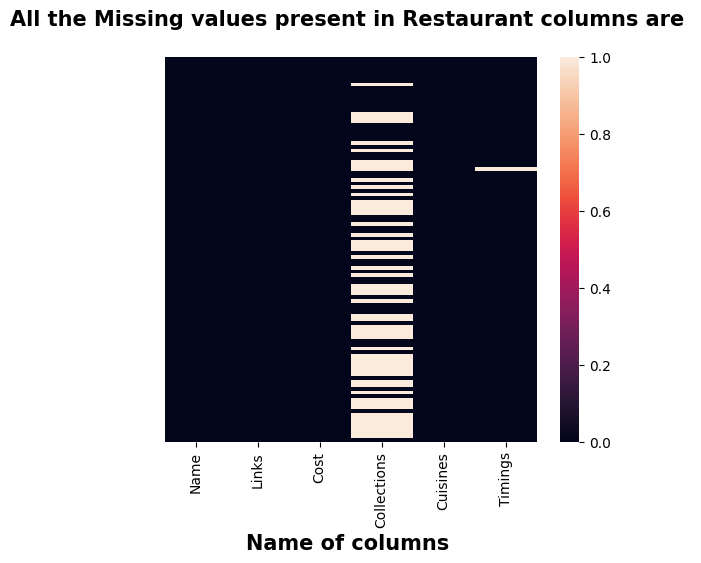

In [17]:
plt.figure(figsize=(6,5))
sns.heatmap(restaurant_df.isnull(), cbar=True , yticklabels= False)
plt.xlabel('Name of columns ', size =15, weight='bold')
plt.title('All the Missing values present in Restaurant columns are \n', fontweight= 'bold', size=15)


Text(0.5, 1.0, 'All the Missing values present in Review columns are \n')

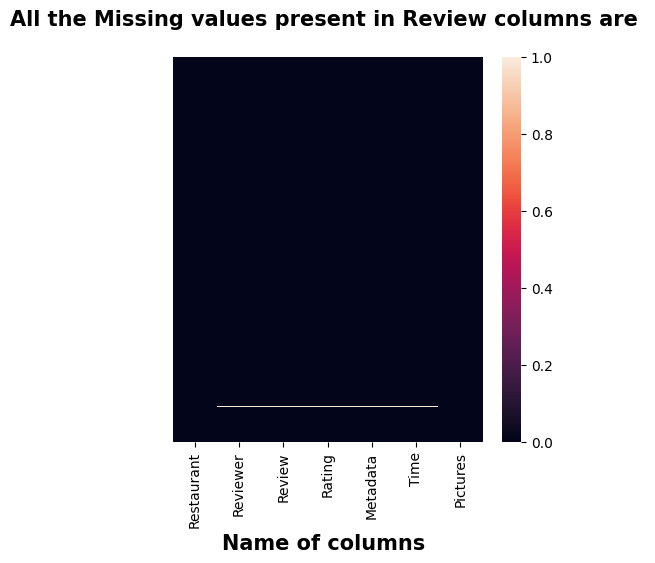

In [18]:
# Visualizing the missing values
plt.figure(figsize=(5,5))
sns.heatmap(review_df.isnull(), cbar=True , yticklabels= False)
plt.xlabel('Name of columns ', size =15, weight='bold')
plt.title('All the Missing values present in Review columns are \n', fontweight= 'bold', size=15)


### What did you know about your dataset?

There are two data sets provided for the analysis. One is based on the information about the various restaurant that uses the Zomato delivery services ,the file named as meta data. Another one is based on reviews given by the customers to those particular restaurants that are mentioned the meta data .Meta files has the dimension 105 rows and 6 columns as variables and the reviews files has the dimensions of 1000 rows and 7 columns . Also there are 36 duplicates values in the review file but there are no duplicates in meta data file. In addition to that there are also missing values in both the datasets.

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
print(f' The columns present in the Restaurant dataset \n')

print(restaurant_df.columns.to_list() ,'\n')

 The columns present in the Restaurant dataset 

['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'] 



In [20]:
print(f'\n The columns present in Review dataset \n')
print(review_df.columns.to_list())


 The columns present in Review dataset 

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [ ]:
# Dataset Describe
restaurant_df.describe().T

In [21]:
# Dataset Describe
review_df.describe()

,Pictures
count,10000.000000
mean,0.748600
std,2.570381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,64.000000


### Check Unique Values for each variable.

In [22]:
# Check Unique Values for each variable.
print('Number of unique variable present in the Restaurant dataset')
print(restaurant_df.nunique())

Number of unique variable present in the Restaurant dataset
Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64


In [23]:
print('Number of unique variabele present in Review dataset')
print(review_df.nunique())

Number of unique variabele present in Review dataset
Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64


In [24]:
# Code to find unique item in each variable of Restaurant dataset
for col in restaurant_df.columns.tolist():
  print(f' The Unique values of  Restaurant dataset variables -- {col} = \n \n',  restaurant_df[col].unique(),'\n')



 The Unique values of  Restaurant dataset variables -- Name = 
 
 ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kit

In [25]:
# Code to find unique item in each variable of Resturent dataset
for col2 in review_df.columns.tolist():
  print(f'The Unique values present in  {col2} : \n \n {review_df[col2].unique()} \n')

The Unique values present in  Restaurant : 
 
 ['Beyond Flavours' 'Paradise' 'Flechazo' 'Shah Ghouse Hotel & Restaurant'
 'Over The Moon Brew Company' "The Fisherman's Wharf" 'eat.fit'
 'Shah Ghouse Spl Shawarma' 'Hyper Local' 'Cream Stone'
 "Sardarji's Chaats & More" 'Barbeque Nation' 'Absolute Sizzlers'
 'The Lal Street - Bar Exchange' "AB's - Absolute Barbecues" 'KFC'
 'NorFest - The Dhaba' 'Hotel Zara Hi-Fi' '10 Downing Street'
 'Pakwaan Grand' '13 Dhaba'
 "Jonathan's Kitchen - Holiday Inn Express & Suites" 'B-Dubs' 'Amul'
 'SKYHY' 'Tiki Shack' 'Mustang Terrace Lounge'
 "3B's - Buddies, Bar & Barbecue" 'Behrouz Biryani' 'Hunger Maggi Point'
 'Pot Pourri' 'Pista House' 'Marsala Food Company' 'Club Rogue'
 'Mazzo - Marriott Executive Apartments' 'Green Bawarchi Restaurant'
 'Banana Leaf Multicuisine Restaurant' 'Kritunga Restaurant'
 'The Glass Onion' 'Deli 9 Bistro' 'Frio Bistro' 'Karachi Bakery'
 'Karachi Cafe' 'The Foodie Monster Kitchen' 'La La Land - Bar & Kitchen'
 'Owm Nom Nom

## 3. ***Data Wrangling***

### Data Wrangling Code

Data wrangling can be defined as the process of cleaning, organizing, and transforming raw data into the desired format for analyst to use for prompt decision-making. Also known as data cleaning or data munging, data wrangling enables businesses to tackle more complex data in less time, produce more accurate results, and make better decisions. The exact methods vary from project to project depending upon your data and the goal you are trying to achieve. More and more organizations are increasingly relying on data wrangling tools to make data ready for downstream analytics.

**Wrangling Restaurant Dataset:**


Wrangling on Cost feature/variable

In [26]:
restaurant_df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

In [27]:
# Remove the ',' from the cost varible
restaurant_df['Cost']= restaurant_df['Cost'].str.replace(',','').astype('int64')

In [28]:
# Find out the  top 10 costly resturent
Top_10_Expensive_Restaurant=restaurant_df.sort_values('Cost', ascending=False)[['Name', 'Cost']][:10]
Top_10_Expensive_Restaurant

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800
97,Zega - Sheraton Hyderabad Hotel,1750
104,Republic Of Noodles - Lemon Tree Hotel,1700
34,Mazzo - Marriott Executive Apartments,1700
90,Arena Eleven,1600
11,Barbeque Nation,1600


In [29]:
# Find out 10 economicaly  restaurant
Top_10_cheapest_restaurant=restaurant_df.sort_values('Cost', ascending=True)[['Name', 'Cost']][:10]
Top_10_cheapest_restaurant


,Name,Cost
89,Mohammedia Shawarma,150
23,Amul,150
54,Asian Meal Box,200
101,Sweet Basket,200
59,KS Bakers,200
85,Momos Delight,200
29,Hunger Maggi Point,200
103,Wich Please,250
7,Shah Ghouse Spl Shawarma,300
58,Tempteys,350


In [30]:
# spliting the Collection and storing in list
Collections_list = restaurant_df.Collections.dropna().str.split(', ')

In [31]:
# storing all the cusines in a dict
Collections_dict = {}
for collection in Collections_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1

In [33]:
# converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(columns={'index':'Tags',0:'Number_of_Restaurants'})


In [34]:
#top 10 collection
Collections_df.sort_values('Number_of_Restaurants', ascending =False)[:10]

,Tags,Number_of_Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6
3,Top-Rated,5
4,Gold Curated,5
10,Trending This Week,5
9,Sunday Brunches,4
13,Veggie Friendly,4



Wrangling on Cuisine variable

In [35]:
# store type of food in a a list with spliting all the food
cuisine_list =restaurant_df.Cuisines.str.split(', ')

In [36]:
# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [37]:
# converting the dict to a data frame
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Type_of_Food',0:'Number_of_Restaurants'})


In [38]:
#top 10 cuisine
cusine_of_the_data=cuisine_df.sort_values('Number_of_Restaurants', ascending =False)
cusine_of_the_data[:10]

,Type_of_Food,Number_of_Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15
7,Asian,15
20,Italian,14
9,Desserts,13
4,South Indian,9
29,Bakery,7


# Review :

Wrangling on Rating variable/Feature

In [39]:
review_df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

In [40]:
# convert Like into nan and type  of data
review_df.loc[review_df['Rating']=='Like']=np.nan
review_df['Rating']= review_df['Rating'].astype('float')

In [41]:
# Filling Null values by mean
review_df['Rating'].fillna(3.5, inplace=True)
review_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [42]:
# Split the Time columns into Year Month and Hours
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,2019.0,5.0,21.0


In [43]:
# code to find top reviewer
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)
top_10_reviewers = reviewer_list[:10]
top_10_reviewers

,Reviewer,Review_Count
655,Ankita,13
3858,Parijat Ray,13
2654,Kiran,12
2313,Jay Mehta,11
7013,Vedant Killa,11
5958,Siva Kumar,10
4259,Priyanka,10
6130,Sravani,10
3134,Manojkumar D Nambisan,10
265,Age Of Foodies (Suraj Karambe),10


In [44]:
# Average of the ratings of reviewers with review count
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average_Ratings')
review_ratings=pd.merge(top_10_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_10_reviewers_ratings=review_ratings[:10]
top_10_reviewers_ratings=top_10_reviewers_ratings.sort_values(by = 'Average_Ratings',ascending=False)
top_10_reviewers_ratings.head(10)

,Reviewer,Review_Count,Average_Ratings
2,Kiran,12,4.500000
4,Vedant Killa,11,4.000000
7,Sravani,10,4.000000
0,Ankita,13,3.923077
3,Jay Mehta,11,3.727273
8,Manojkumar D Nambisan,10,3.700000
5,Siva Kumar,10,3.600000
9,Age Of Foodies (Suraj Karambe),10,3.500000
1,Parijat Ray,13,3.192308
6,Priyanka,10,2.600000


In [45]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,2019.0,5.0,21.0


In [46]:
#Average engagement of restaurants
avg_hotel_rating = review_df.groupby('Restaurant').agg({'Rating':'mean','Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,10 Downing Street,3.80,100
1,13 Dhaba,3.48,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
3,AB's - Absolute Barbecues,4.88,100
4,Absolute Sizzlers,3.62,100
...,...,...,...
95,Urban Asia - Kitchen & Bar,3.65,100
96,Yum Yum Tree - The Arabian Food Court,3.56,100
97,Zega - Sheraton Hyderabad Hotel,4.45,100
98,Zing's Northeast Kitchen,3.65,100


In [47]:
# merging both data frame
restaurant_df = restaurant_df.rename(columns = {'Name':'Restaurant'})
merged_df = restaurant_df.merge(review_df, on = 'Restaurant')
merged_df.shape

(9999, 15)

In [48]:
merged_df.head()

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Month,Hour
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,2019.0,5.0,15.0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,2019.0,5.0,14.0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2019.0,5.0,22.0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,2019.0,5.0,22.0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,2019.0,5.0,21.0


### What all manipulations have you done and insights you found?


Firstly, I   started with changing the datatype of the variable present in the dataset like cost and rating. This will help to make data consistent.

I found 10 Expensive Restaurant from the top and top 10 cheapest Restaurants.

Top 10 Collection and Top 10 Cuisine.

Splited the Time Variable into new variable like Year Month and Hours.

Merge the Restaurant and Review variable with Name and Restaurants.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

# EDA on MetaData file

#### Chart - 1

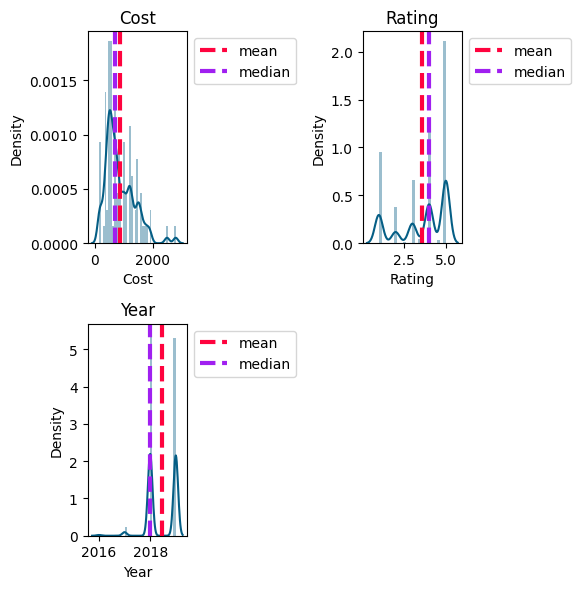

In [49]:
# Chart - 1 visualization code
plt.figure(figsize = (6,6));
for i,col in enumerate(['Cost','Rating','Year']) :
    plt.subplot(2,2,i+1);
    sns.distplot(merged_df[col], color = '#055E85');
    feature = merged_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

I picked up Distplot which is helpful for understanding the distribution of the Distplot is helpful in understanding the distribution of the variable.

##### 2. What is/are the insight(s) found from the chart?

From the distplot I found that all three variable present have some skewness present into it and Maximum restaurants show the price range of 500 and 2018 and 2019 have high volume of review found.


##### 3. Will the gained insights help creating a positive business impact?


I found important information that is  Cost which makes high impact on business along with rating which show how much the person is engaged with the product.

#### Chart - 2

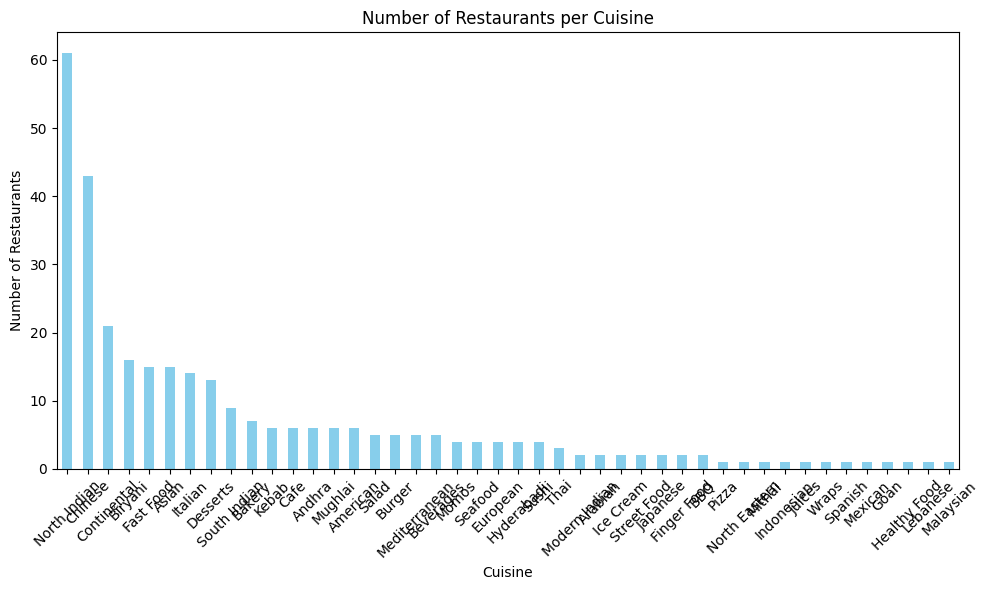

In [50]:
# Chart - 2 visualization code
cuisine_counts = restaurant_df['Cuisines'].str.split(', ', expand=True).stack().value_counts()
plt.figure(figsize=(10, 6))
cuisine_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Restaurants per Cuisine')
plt.xlabel('Cuisine')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

To visualize restaurant counts per cuisine.

##### 2. What is/are the insight(s) found from the chart?

 Chinese cuisine dominates with the highest number of restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:** Helps identify popular cuisines for targeted marketing.

**Negative Growth**: Over-saturation of Chinese restaurants may lead to intense competition.

#### Chart - 3

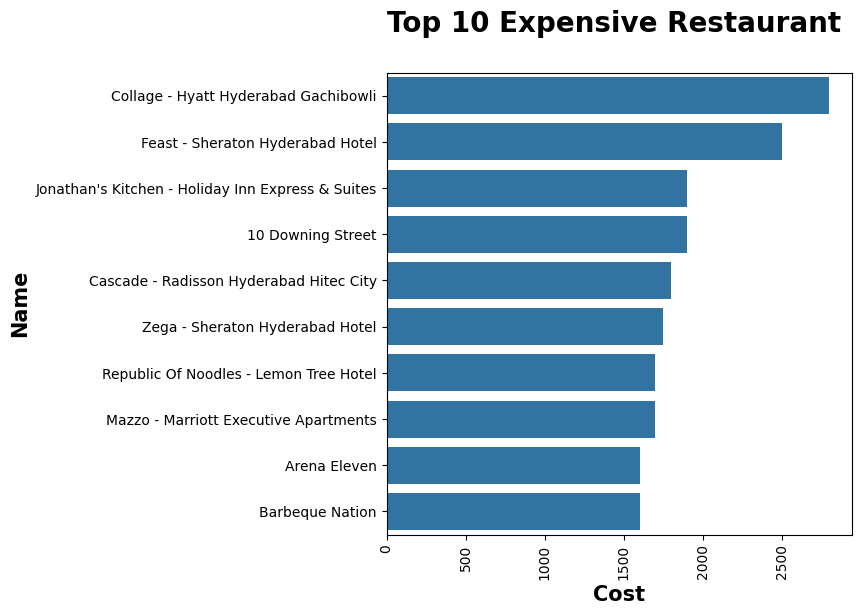

In [51]:
# Chart - 3 visualization code
# Top 10 Expensive Restaurants
plt.figure(figsize=(6,6))
x = Top_10_Expensive_Restaurant['Cost']
y = Top_10_Expensive_Restaurant['Name']
plt.title("Top 10 Expensive Restaurant \n",fontsize=20,weight='bold')
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y)
plt.show()

##### 1. Why did you pick the specific chart?


I have chosen chosen bar plot to find the Expensive and Cheapest restaurants.

##### 2. What is/are the insight(s) found from the chart?

 I have found top 10 expensive and cheapest restaurants from th given dataset.

##### 3. Will the gained insights help creating a positive business impact?



Are there any insights that lead to negative growth? Justify with specific reason.


The insight I get from the given barchart will make high impact in business because it helps us n making the decision financially.

#### Chart - 4

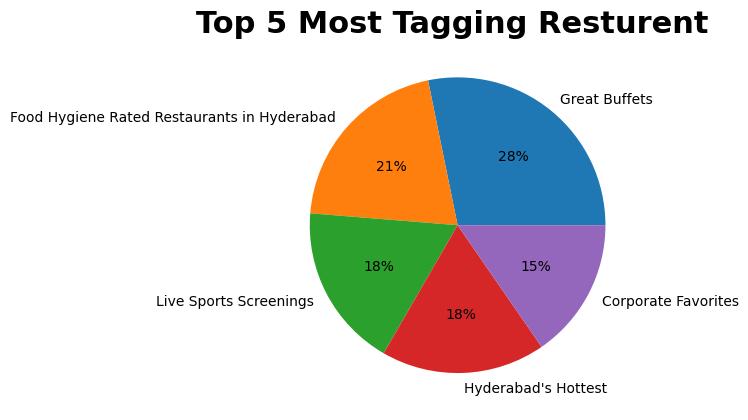

In [52]:
# Chart - 4  visualization code pie chart for top 5 Tagging Resturent
collection_list = Collections_df.sort_values('Number_of_Restaurants', ascending = False)['Tags'].tolist()[:5]
data = Collections_df.sort_values('Number_of_Restaurants', ascending = False) ['Number_of_Restaurants'].tolist()[:5]
labels = collection_list


#create pie chart
plt.pie(data, labels = labels,  autopct='%.0f%%')
plt.title('Top 5 Most Tagging Resturent ', size =22, weight='bold')
plt.show()

##### 1. Why did you pick the specific chart?

I have pick up the pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the variable.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I got to know that from the top 5 'Tags' there are 28% of them belong to 'Great Buffets', 21% of them belong to Food Hygiene Rated restaurants in Hyderabad , 18% of them are Hyderabad's Hottest and 15% are Corporate Favorites.

#### Chart - 5

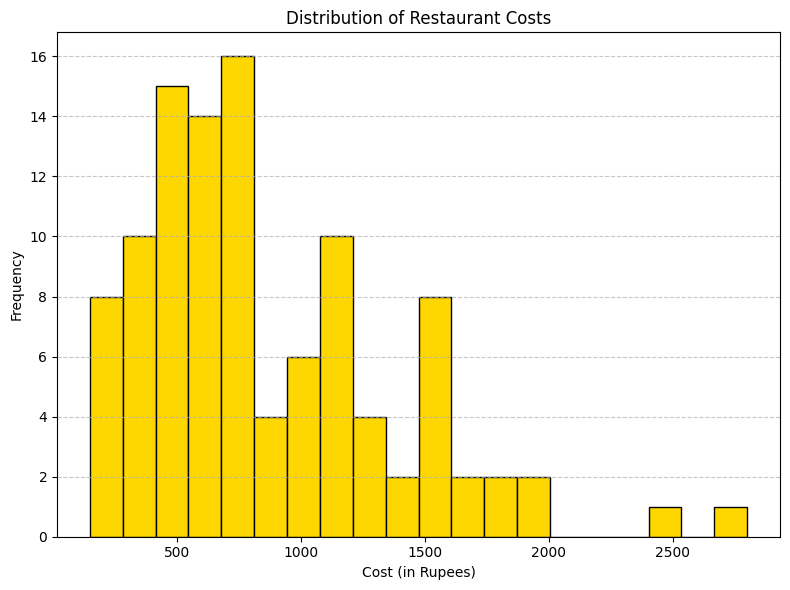

In [53]:
# Chart - 5 visualization code
plt.figure(figsize=(8, 6))
plt.hist(restaurant_df['Cost'], bins=20, color='gold', edgecolor='black')
plt.title('Distribution of Restaurant Costs')
plt.xlabel('Cost (in Rupees)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose the histogram because it effectively displays the distribution of restaurant costs, providing insights into the range and frequency of different cost levels.

##### 2. What is/are the insight(s) found from the chart?

Insights from the chart reveal the distribution of restaurant costs, indicating the most common price ranges and helping businesses understand market preferences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


Positive impact: Analyzing restaurant cost distribution aids in optimizing pricing strategies to align with customer preferences, enhancing profitability.

Negative impact: Concentration of costs at extreme price points suggests market segmentation issues or pricing discrepancies, potentially harming profitability.

#### Chart - 6

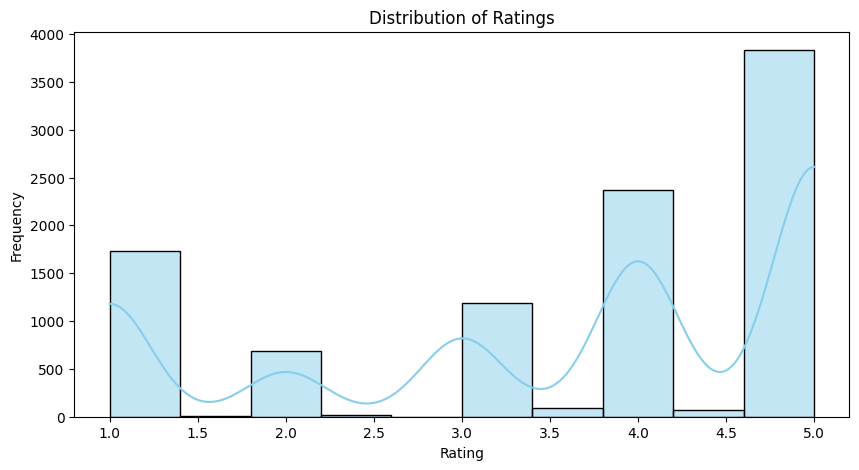

In [54]:
# Chart - 6 visualization code for Distribution of Rating
plt.figure(figsize=(10, 5))
sns.histplot(review_df['Rating'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

I chose the histogram with KDE plot because it provides a visual representation of the distribution of ratings and includes a kernel density estimate for smoothness.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that the majority of ratings cluster around the higher end, suggesting overall positive feedback for the restaurant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive impact:**Understanding the distribution of ratings can guide strategic decisions to enhance customer satisfaction, potentially leading to increased patronage and positive business growth.

**Negative impact:** If there's a significant concentration of low ratings, it may signal dissatisfaction among customers, potentially leading to decreased patronage and negative business growth.

#### Chart - 7

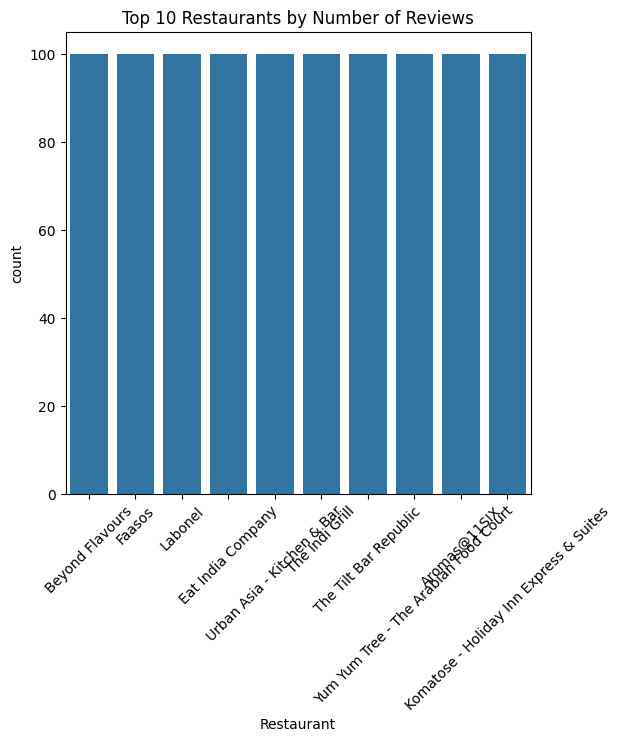

In [55]:
# Chart - 7 visualization code for Count of Reviews by Restaurant
plt.figure(figsize=(6, 6))
sns.countplot(x='Restaurant', data=review_df, order=review_df['Restaurant'].value_counts().index[:10])
plt.title('Top 10 Restaurants by Number of Reviews')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

I chose the countplot because it effectively displays the distribution of reviews among the top 10 restaurants.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is the comparative number of reviews among the top 10 restaurants.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive impact:** Identifying the most reviewed restaurants can help focus marketing efforts and improve customer engagement, potentially leading to increased foot traffic and positive business growth.

**Negative impact:**If certain restaurants have significantly fewer reviews compared to others in the top 10, it may indicate a lack of popularity or customer satisfaction issues, potentially leading to negative growth in those establishments.

#### Chart - 8

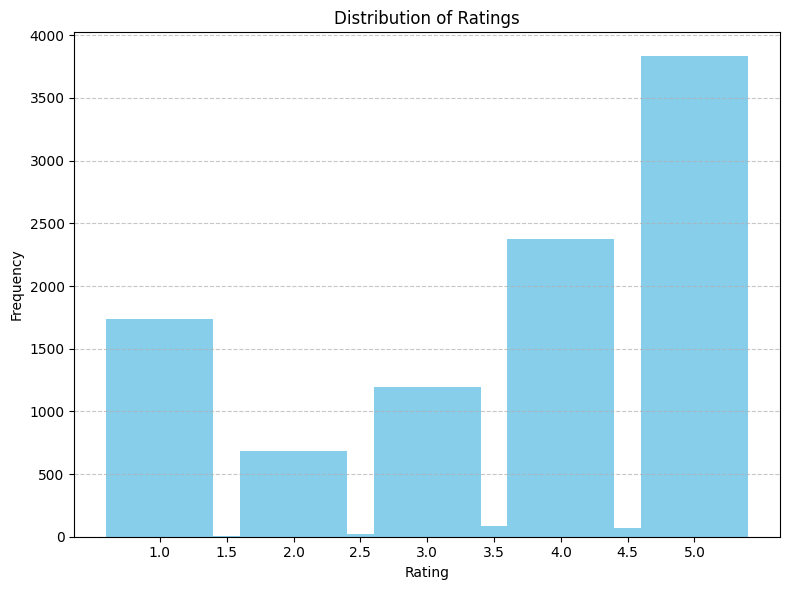

In [56]:
# Chart - 8 visualization code for  Count ratings
rating_counts = review_df['Rating'].value_counts().sort_index()

# Bar chart
plt.figure(figsize=(8, 6))
plt.bar(rating_counts.index, rating_counts.values, color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.xticks(rating_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked the bar chart because it effectively displays the distribution of ratings, which is a common metric for evaluating restaurant performance.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is that most ratings fall within the higher range, indicating generally positive feedback for the restaurant.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can help in understanding customer satisfaction levels, guiding improvements in service or menu offerings to enhance positive business impact. However, if there were a significant number of low ratings, it could indicate areas of concern needing attention to prevent negative growth.

#### Chart - 9

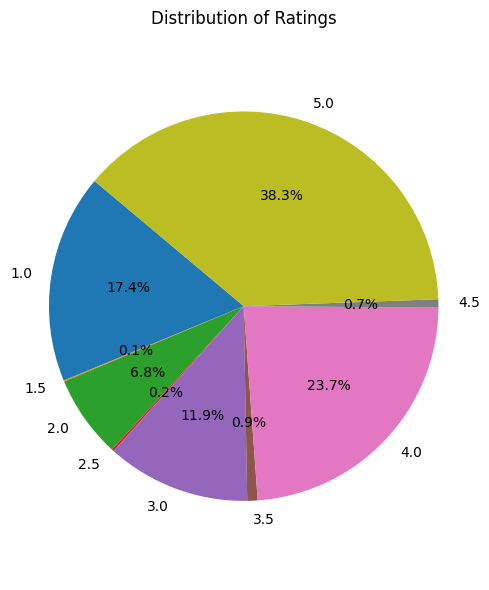

In [57]:
# Chart - 9 visualization code for Pie chart of Ratings
plt.figure(figsize=(5, 6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ratings')
plt.axis('equal')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose the pie chart because it effectively illustrates the distribution of ratings as percentages of the whole.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart is the proportional representation of each rating category.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive impact:**Understanding the distribution of ratings can help identify areas of improvement in products or services, leading to enhanced customer satisfaction and potentially increased business.

**Negative impact:** If a significant portion of the ratings is low, it may indicate dissatisfaction among customers, potentially leading to negative growth due to declining sales or reputation damage.

#### Chart - 10 - Pair Plot

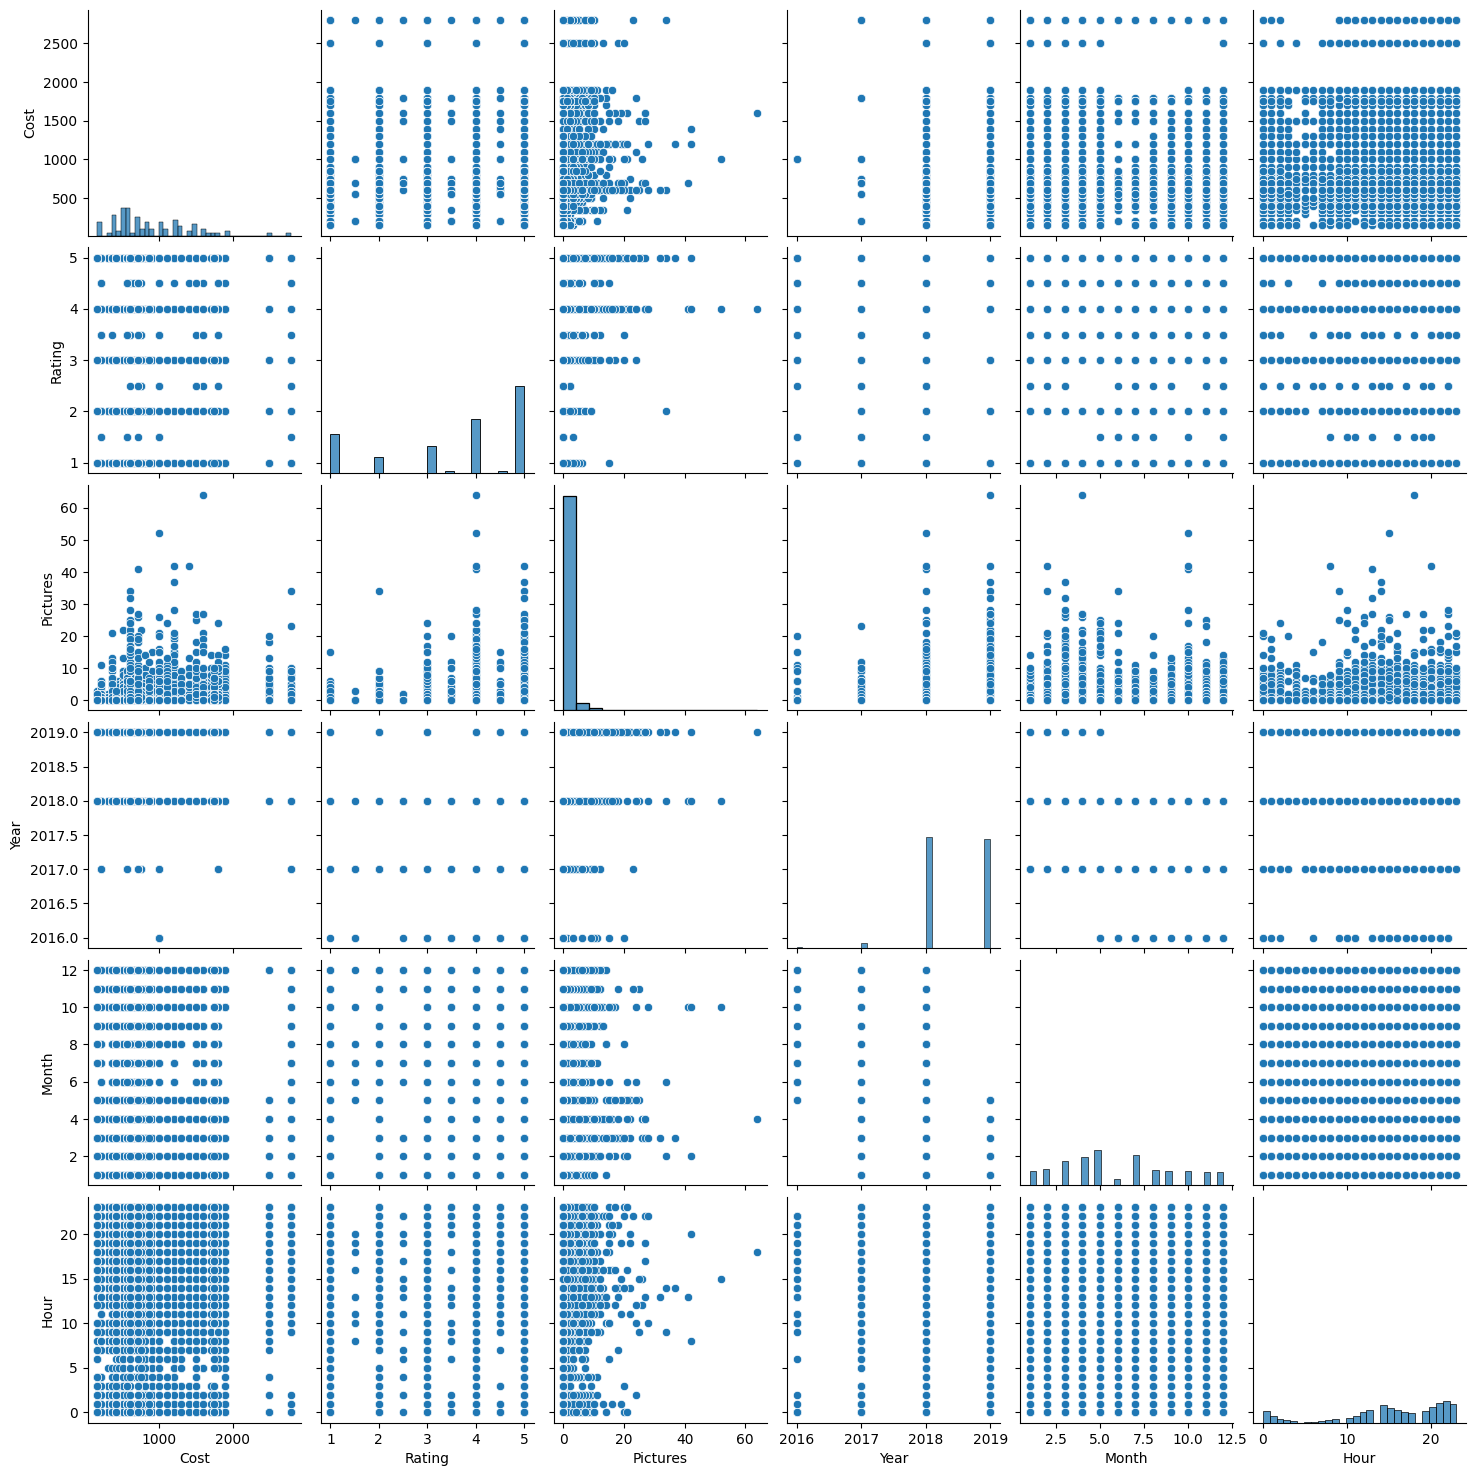

In [58]:
# Pair Plot visualization code
sns.pairplot(merged_df)


##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.
Thus, I used pair plot to analyse the patterns of data and realationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

**Chart- 11**

(-0.5, 1399.5, 1399.5, -0.5)

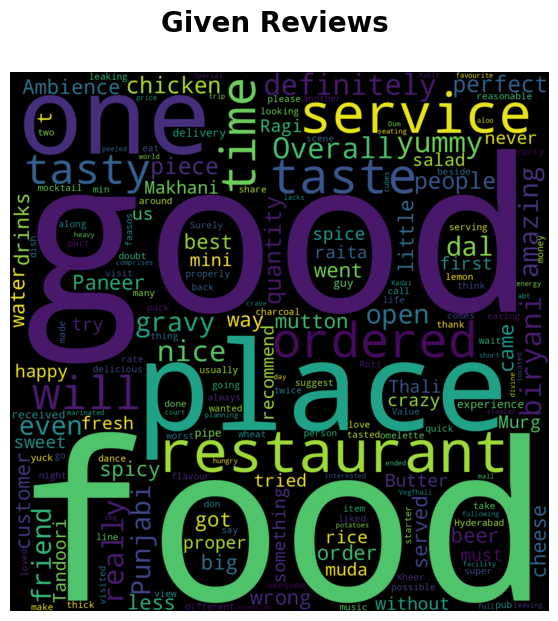

In [59]:
#Creating word cloud for reviews
from wordcloud import WordCloud
plt.figure(figsize=(7,7))
text = " ".join(name for name in review_df.sort_values('Review',ascending=False).Review[:30])


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 1400, height = 1400, collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud

plt.imshow(word_cloud, interpolation='bilinear')

plt.title('Given Reviews \n',fontsize=20, weight = 'bold')
plt.axis("off")


1. Why did you pick the specific chart?

I have pick this WordCloud for the visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.

2. What is/are the insight(s) found from the chart?

Word chart we can clearly say that the word which appear bigger is more offenly used and the more offely used word like Food, Good, Place, Resturent so on.

3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Word chart helps in Advertisement which directly import on business which helps to analyse.

**Chart- 12**

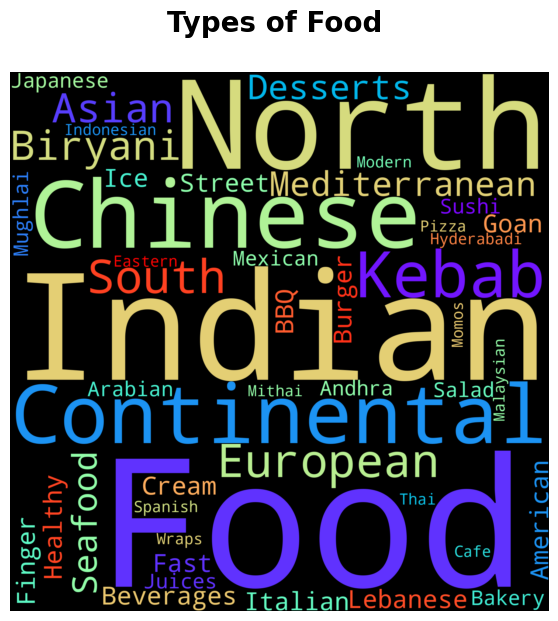

In [60]:
#  wordcloud for Cuisine
# storing all cuisine in form of text
plt.figure(figsize=(7,7))
text = " ".join(name for name in cuisine_df.Type_of_Food )


# Creating word_cloud with text as argument in .generate() method

word_cloud = WordCloud(width = 2000, height = 2000, collocations = False, colormap='rainbow', background_color = 'black').generate(text)

# Display the generated Word Cloud


plt.title('Types of Food \n',fontsize=20, weight = 'bold')
plt.imshow(word_cloud, interpolation='bilinear');

plt.axis("off");

1. Why did you pick the specific chart?


We have pict this WordCloud for the visual representation of a text, in which the words appear bigger the more often they are mentioned. Word clouds are great for visualizing unstructured text data and getting insights on trends and patterns.



2. What is/are the insight(s) found from the chart?


Word chart we can clearly say that the word which appear bigger is more offenly used and the more offely used word like North, Indian, Food, Chinees, Biryani etc



3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



The given Word chart helps in Advertisement which directly import on business which helps to analyse.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on the dataset, three hypothetical statements emerge: a positive correlation between restaurant ratings and the number of reviews; a potential relationship between higher ratings and increased follower counts for restaurants; and the influence of metadata on restaurant ratings. To validate these hypotheses, statistical testing will be conducted, including Pearson correlation coefficient test, independent t-test for mean follower counts.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)

Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)

Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [61]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf
# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged_df).fit()

p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straight forward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0):** The average rating for restaurants with pictures is the same as those without pictures.

**Alternative Hypothesis (H1):** The average rating for restaurants with pictures is different from those without pictures.

#### 2. Perform an appropriate statistical test.

In [63]:
import scipy.stats as stats

# Splitting the dataset into two groups based on the presence of pictures
with_pictures = review_df[review_df['Pictures'] > 0]['Rating']
without_pictures = review_df[review_df['Pictures'] == 0]['Rating']

# Performing the independent t-test
t_statistic, p_value = stats.ttest_ind(with_pictures, without_pictures, equal_var=False)

# Checking the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The average rating for restaurants with pictures is different from those without pictures.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average rating between restaurants with and without pictures.")


Reject the null hypothesis: The average rating for restaurants with pictures is different from those without pictures.


##### Which statistical test have you done to obtain P-Value?

The statistical test performed to obtain the p-value is an independent samples t-test.

##### Why did you choose the specific statistical test?

The independent samples t-test was chosen because it is suitable for comparing the means of two independent groups to determine if there is a statistically significant difference between them. In this case, the hypothesis is comparing the average ratings for restaurants with and without pictures, making the independent samples t-test appropriate for the analysis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)

Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)

Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [64]:
pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])[:1]


Rating,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
Cuisines,,,,,,,,,
American,1,0,1,0,2,0,8,0,88


In [65]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged_df['Cuisines'], merged_df['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis : Thats's mean the variety of cuisines offered by a restaurant has no effect on its rating.")
else:
    print("Fail to reject Null Hypothesis : That's mean the variety of cuisines offered by a restaurant has a positive effect on its rating.")

Reject Null Hypothesis : Thats's mean the variety of cuisines offered by a restaurant has no effect on its rating.


##### Which statistical test have you done to obtain P-Value?

For the third hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?

I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

Handle Duplicate Values from the dataset

In [66]:
# Check the duplcate values persent in the data set
print(f'Total number of Duplicate Value present in Restaurant dataset {restaurant_df.duplicated().sum()} \n')
print(f'Total number of Duplicate Value present in Review dataset {review_df.duplicated().sum()}')

Total number of Duplicate Value present in Restaurant dataset 0 

Total number of Duplicate Value present in Review dataset 36


In [67]:
# Drop Duplicate values from the dataset
review_df.drop_duplicates(inplace= True)
# check the duplcate value after drop
print(f'Total numer of Duplicate Value present in Restaurant dataset  {restaurant_df.duplicated().sum()} \n')
print(f'Total numer of Duplicate Value present in Review datast set {review_df.duplicated().sum()}')

Total numer of Duplicate Value present in Restaurant dataset  0 

Total numer of Duplicate Value present in Review datast set 0


**Handle Missing values from Restaurants Dataset**

In [68]:
# Handling Missing Values & Missing Value Imputation
restaurant_df.isnull().sum()

Restaurant      0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [69]:
# Fill null values with mode
restaurant_df.Timings.fillna(restaurant_df.Timings.mode()[0],inplace=True)


In [70]:
# check percentage of missing values  in Collections
missing_percentage = ((restaurant_df['Collections'].isnull().sum())/(len(restaurant_df['Collections'])))*100
print(f'Percentage of missing value in Collections is {round(missing_percentage, 2)}%')


Percentage of missing value in Collections is 51.43%


In [71]:
# More then 50% of the data is missing so we are droping the colllection collumns
restaurant_df.drop('Collections', axis=1, inplace = True)
restaurant_df.isnull().sum()

Restaurant    0
Links         0
Cost          0
Cuisines      0
Timings       0
dtype: int64

**Handle Missing values from Review Dataset**

In [72]:
review_df.isnull().sum()

Restaurant     1
Reviewer       3
Review        10
Rating         0
Metadata       3
Time           3
Pictures       1
Year           3
Month          3
Hour           3
dtype: int64

In [73]:
review_df[review_df['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Month,Hour
7601,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN
8777,American Wild Wings,NaN,NaN,3.5,NaN,NaN,0.0,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,3.5,NaN,NaN,0.0,NaN,NaN,NaN


In [74]:
review_df['Restaurant'].dropna(inplace = True)

In [75]:
review_df = review_df.dropna(subset=['Restaurant','Reviewer','Review'])
review_df.isnull().sum()


Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
Year          0
Month         0
Hour          0
dtype: int64

In [76]:
#filling null values in review and reviewer follower column
review_df = review_df.fillna({"Review": "No Review", "Followers": 0})
review_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
Year          0
Month         0
Hour          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I started with removing duplicte values present in review dataset and handle missing vlaues present in both restaurant and Review dataset.

Dataset that contains details about restaurant, had 1 null value in timing feature and more than 50% null value in collection feature. In order to treat with those I first replaced the null value for timing with mode since there was only one null and mode is robust to outliers plus that hotel name was one unique feature which had all other feature except timing and collection so it was better to preserve that data. Since there was more than 50% null values in collection feature, I removed the entire column because columns with a high percentage of null values are likely to have a lot of missing data, which can make it difficult to accurately analyze or make predictions based on the data.

In the dataset tha has details of reviewer had Reviewer - 2, Review - 9, Rating - 2, Metadata - 2, Time - 2, Reviewer_Total_Review- 3, Reviewer_Followers - 1581, Review_Year - 2, Review_Month - 2, Review_Hour - 2. On analysing I found that feature like reviewer and reviewer total review had all null values, therefore I removed those two columns which made null values in other feature to zero except in review and reviewer followers columns. Since review was textual data, I changed those 7 null values to 'no review' and reviewer followers to 0 as follower is the meta data for reviewer and it can be 0.

And thus all the null values were treated, at the end I then again merged both the dataset hotel and review dataset.

### 2. Handling Outliers

In [77]:
# Handling Outliers & Outlier treatments

#Anamoly detection
from sklearn.ensemble import IsolationForest
#checking for normal distribution
print("Skewness - Cost: %f" % merged_df['Cost'].skew())
print("Kurtosis - Cost: %f" % merged_df['Cost'].kurt())



Skewness - Cost: 1.150631
Kurtosis - Cost: 1.556612


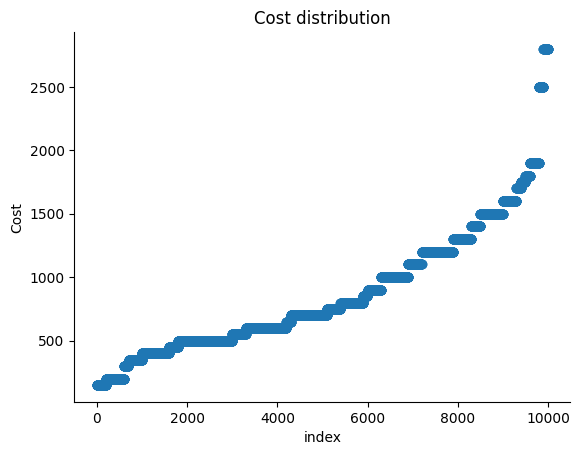

In [78]:
# Scatter Plot of Cost
plt.scatter(range(merged_df.shape[0]), np.sort(merged_df['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()


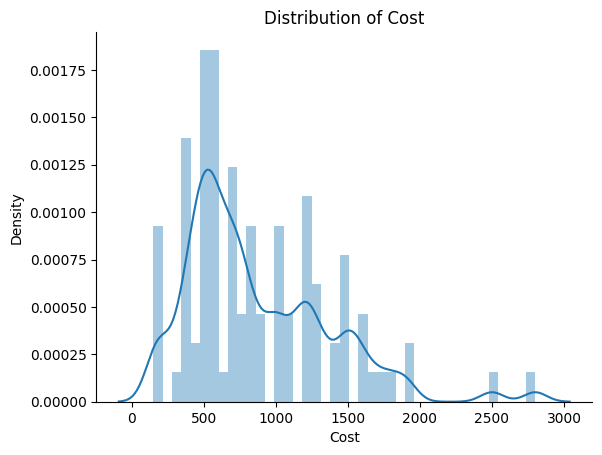

In [79]:
#distribution of cost
sns.distplot(merged_df['Cost'])
plt.title("Distribution of Cost")
sns.despine()


In [80]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged_df['Cost'].values.reshape(-1, 1))
merged_df['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(merged_df['Cost'].values.reshape(-1, 1))
merged_df['outlier_univariate_Cost'] = isolation_forest.predict(merged_df['Cost'].values.reshape(-1, 1))


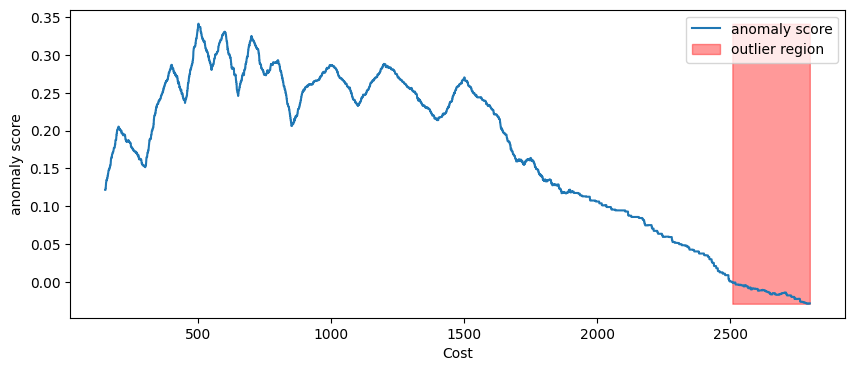

In [81]:
#chart to visualize outliers
xx = np.linspace(merged_df['Cost'].min(), merged_df['Cost'].max(), len(merged_df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

**Treating Outlier**

In [82]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged_df.describe().columns:
  if abs(merged_df[i].mean()-merged_df[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['anomaly_score_univariate_Cost', 'outlier_univariate_Cost']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Year', 'Month', 'Hour']


In [83]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [84]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
restaurant_df.loc[restaurant_df['Cost']<= outlier_treatment_skew(df=restaurant_df, feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=restaurant_df,feature='Cost')[1]

#upper limit capping
restaurant_df.loc[restaurant_df['Cost']>= outlier_treatment_skew(df=restaurant_df, feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=restaurant_df,feature='Cost')[0]


In [85]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
restaurant_df = restaurant_df.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
restaurant_df.head(1)


,Restaurant,Links,Cost,Cuisines,Timings,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.28



##### What all outlier treatment techniques have you used and why did you use those techniques?

I  have found that  feature show positively skew distribution and using isolation forest they have outliers, So We have used capping technique instead of removing outliers, capped outliers with the highest and lowest limit using IQR method.

### 3. Categorical Encoding

In [86]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = restaurant_df[['Restaurant','Cuisines']]

#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')

#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')

#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())

#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")


#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [87]:
#total cuisine count
restaurant_df['Total_Cuisine_Count'] = restaurant_df['Cuisines'].apply(lambda x : len(x.split(',')))

In [88]:
restaurant_df.head()

,Restaurant,Links,Cost,Cuisines,Timings,Average_Rating,Total_Cuisine_Count
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.28,6
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,4.70,3
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4.66,4
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,3.21,5
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",4.34,5


In [89]:
cluster_dummy.head(2)


,Restaurant,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Goan,Healthy Food,Hyderabadi,Ice Cream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Mediterranean,Mexican,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,10 Downing Street,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,13 Dhaba,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [90]:
#adding cost column to the new dataset
cluster_dummy = restaurant_df[['Restaurant','Cost','Total_Cuisine_Count']].merge(cluster_dummy, on = 'Restaurant')
cluster_dummy.shape

(100, 45)

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding on the cuisine category and based on the cuisine if present i gave value to 1 and if absent gave value of 0. Benefit of using one hot encoding:

Handling categorical variables with no ordinal relationship:
One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for categorical features that do not have a natural ordering.

Handling categorical variables with many unique values
One-hot encoding can handle categorical features with a high cardinality, which can be useful when there are many unique categories.

Handling categorical variables with multiple levels
One-hot encoding can handle categorical features with multiple levels, such as "state" and "city". This can be useful when there are many unique combinations of levels.

Handling categorical variables with missing values
One-hot encoding can handle missing values by creating a new category for them.

Model interpretability
One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable.

Compatibility with many machine learning models
One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [91]:
# creating new df for text processing of sentiment analysis
sentiment_df = review_df[['Reviewer','Restaurant','Rating','Review']]
# analysing five random sample
sentiment_df.sample(5)


,Reviewer,Restaurant,Rating,Review
7809,Harshet Agarwal,Khaan Saab,5.0,needless to say the place has been there for m...
9709,Avin Seth,Zega - Sheraton Hyderabad Hotel,5.0,Crazy place with crazy people mad over drinks ...
3132,Vijay,Pista House,5.0,Superb tandoori chicken. Mint chutney is aweso...
5496,Ankit Agarwal,Asian Meal Box,1.0,I just got a rice meal box which included ging...
2035,Shubham Shinde,13 Dhaba,4.0,This place reminds me of Pune's Khau Galli. Th...


In [92]:
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
4269,4269,Mrutunjay Kinagi,Karachi Cafe,5.0,Place when you want to hangout for a chai with...
9614,9614,Kamaal Ahmed (zaiqebaaz),Hyderabadi Daawat,5.0,Ask anyone what you like about Hyderabad the m...
4272,4272,Ahmedconstruction2017,Karachi Cafe,5.0,"An amazing cafe by karachi bakers, each and ev..."
1439,1439,Ravikumar Madiwalar,AB's - Absolute Barbecues,5.0,Excellent service.. Maintain the same. caring ...
5793,5793,Veerakumar Perika,Being Hungry,2.0,waste


In [93]:
 # Install contractions
!pip install contractions
# import sys
import sys
!{sys.executable} -m pip install contractions
# import contactions
import contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 13.2 MB/s eta 0:00:00


In [94]:
# Expand Contraction
# applying fuction for contracting text
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

#### 2. Lower Casing

In [95]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()
sentiment_df.head()

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.0,"the ambience was good, food was quite good . h..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,ambience is too good for a pleasant evening. s...
2,2,Ashok Shekhawat,Beyond Flavours,5.0,a must try.. great food great ambience. thnx f...
3,3,Swapnil Sarkar,Beyond Flavours,5.0,soumen das and arun was a great guy. only beca...
4,4,Dileep,Beyond Flavours,5.0,food is good.we ordered kodi drumsticks and ba...


#### 3. Removing Punctuations

In [96]:
# Code to Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)


In [97]:
#remove punctuation using  Created function
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df.sample(5)


,index,Reviewer,Restaurant,Rating,Review
9627,9627,Avinash Tummala,Hyderabadi Daawat,4.0,visited this place today we ordered murgh kalm...
6918,6918,Roopkamal Singh Bujrall,The Indi Grill,5.0,best place to visit n subhandhu and aritham n ...
7056,7056,Amol Chaitanya,Urban Asia - Kitchen & Bar,4.0,nice place to enjoy some south east asian food...
545,545,Rajesh Raj,The Fisherman's Wharf,5.0,what a amazing place where i feel wow special ...
4398,4398,Nissy,The Foodie Monster Kitchen,5.0,food is awesome it will be great if they allow...


#### 4. Removing URLs & Removing words and digits contain digits.

In [98]:
# Import Library
import re
# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))
# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

In [99]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
restaurant_df['Location'] = restaurant_df['Links'].apply(get_location)
restaurant_df.sample(2)

,Restaurant,Links,Cost,Cuisines,Timings,Average_Rating,Total_Cuisine_Count,Location
42,Karachi Cafe,https://www.zomato.com/hyderabad/karachi-cafe-...,600,"Cafe, Desserts, Fast Food",10 AM to 10 PM,3.715,3,hyderabad
58,Tempteys,https://www.zomato.com/hyderabad/tempteys-gach...,350,"Desserts, Beverages",11:30 AM to 1 AM,3.850,2,hyderabad


#### 5. Removing Stopwords & Removing White spaces

In [104]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [105]:
from nltk.corpus import stopwords

In [106]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [107]:
# function call to remove Stopwords

def remove_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

# Remove Stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_stopwords)

In [108]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

#random sample
sentiment_df.sample(2)

,index,Reviewer,Restaurant,Rating,Review
7681,7681,Epicurean Tales,The Old Madras Baking Company,4.0,place located near hdfc bank inside meenakshi ...
6646,6646,Venkatesh Nekkanti,Aromas@11SIX,3.0,ordered schezwan chicken via swiggy last night...


#### 6. Rephrase Text

In [109]:
# function to create rephrase sentence
def rephrase_sentence(sentence):
     # Tokenize the sentence
     tokens = nltk.word_tokenize(sentence)

     # Replace each token with its synonyms
     new_sentence = []
     for token in tokens:
         synonyms = wordnet.synsets(token)
         if synonyms:
             new_sentence.append(synonyms[0].lemmas()[0].name())
         else:
             new_sentence.append(token)

      #Join the tokens back into a sentence
     rephrased_sentence = " ".join(new_sentence)

     return rephrased_sentence

#### 7. Tokenization

In [110]:
# Tokenization
import nltk
nltk.download('punkt')

sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)
sentiment_df.sample(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,index,Reviewer,Restaurant,Rating,Review
7121,7121,Paresh Meshram,Eat India Company,4.0,"[went, team, lunch, took, buffet, nice, place,..."
9408,9408,Agnimitra Chakraborty,Dunkin' Donuts,3.0,"[went, evening, snacks, place, clean, tables, ..."
9323,9323,Eeha Ashok,Zing's Northeast Kitchen,4.0,"[one, places, tried, north, eastern, food, pla..."
159,159,Shashank Sinha,Paradise,5.0,"[chicken, biriyani, good, chicken, pice, soft,..."
5833,5833,Yum Yum YUMMY !,Tempteys,4.0,"[overall, experience, seating, taste, service,..."


#### 8. Text Normalization

In [111]:
#applying Lemmatization
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)
sentiment_df.sample(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...


,index,Reviewer,Restaurant,Rating,Review
4730,4730,Arpana Majumder,Shanghai Chef 2,1.0,"[found, cockroach, food, unhygienic, pace, dir..."
3706,3706,Abhishek Katta,Kritunga Restaurant,4.0,"[perfect, place, taste, rayalaseema, food, lov..."
6333,6333,Mitesh Gupta,Dine O China,4.0,"[gone, dinner, ordered, veg, manchow, sour, ve..."
4238,4238,GoSouGo,Karachi Cafe,4.0,"[place, lost, row, cafe, restaurant, gachibowl..."
9157,9157,Amardeep Dabass,Collage - Hyatt Hyderabad Gachibowli,5.0,"[great, experience, place, went, sunday, brunc..."


##### Which text normalization technique have you used and why?

I  have used Lemmatization as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important.

#### 9. Part of speech tagging

In [112]:
# POS Taging
sentiment_tfid = sentiment_df.copy()

Part-of-speech (POS) tagging can be important for sentiment analysis in some cases, as it can provide additional information about the structure and meaning of the text.

For example, certain POS tags, such as adjectives and adverbs, are often used to express sentiment. By identifying these POS tags in the text, a sentiment analysis model can gain a better understanding of the sentiment being expressed. Additionally, certain grammatical structures, such as negations or modals, can change the sentiment of a sentence. By identifying these structures through POS tagging, a sentiment analysis model can take them into account when determining the overall sentiment of the text.

However, it's worth noting that POS tagging is not always necessary for sentiment analysis. In some cases, a model may be able to achieve good performance without using POS tagging. Additionally, the complexity of a model that uses POS tagging increases, which could lead to longer training time and higher computational cost.

In [113]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [114]:
sentiment_tfid['Review'] = sentiment_tfid['Review'].apply(nltk.pos_tag)
sentiment_tfid.sample(5)


,index,Reviewer,Restaurant,Rating,Review
9633,9633,Manaswini Buddappagari,Hyderabadi Daawat,4.0,"[(always, RB), (good, JJ), (see, NN), (restaur..."
3904,3904,Abhinav Kulshrestha,Deli 9 Bistro,5.0,"[(best, JJS), (place, NN), (casual, JJ), (outi..."
9612,9612,Abhilash,Hyderabadi Daawat,4.0,"[(ambiance, NN), (awesome, JJ), (cleanliness, ..."
9747,9747,Hasitha Dharani,Zega - Sheraton Hyderabad Hotel,5.0,"[(went, VBD), (zega, NN), (first, RB), (weddin..."
7485,7485,Aniruddha Ghosh,Faasos,3.0,"[(food, NN), (quality, NN), (good, NN), (overp..."


#### 10. Text Vectorization

In [115]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)

#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

In [116]:
!pip install gensim
import gensim
from gensim import corpora

In [118]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

In [119]:
#print token dict
print(tokens_dict.token2id)

{'also': 0, 'ambience': 1, 'brunch': 2, 'chill': 3, 'cost': 4, 'courteous': 5, 'da': 6, 'effective': 7, 'food': 8, 'friend': 9, 'good': 10, 'helpful': 11, 'lunch': 12, 'one': 13, 'parent': 14, 'place': 15, 'quite': 16, 'really': 17, 'sate': 18, 'saturday': 19, 'soumen': 20, 'waiter': 21, 'evening': 22, 'experience': 23, 'kudos': 24, 'pleasant': 25, 'prompt': 26, 'service': 27, 'alfredo': 28, 'amazing': 29, 'background': 30, 'great': 31, 'music': 32, 'must': 33, 'pasta': 34, 'penne': 35, 'personal': 36, 'pradeep': 37, 'recommendation': 38, 'subroto': 39, 'thnx': 40, 'try': 41, 'arun': 42, 'behavior': 43, 'course': 44, 'guy': 45, 'like': 46, 'sincerety': 47, 'visit': 48, 'would': 49, 'basket': 50, 'biryani': 51, 'drumstick': 52, 'enjoyed': 53, 'goodwe': 54, 'kodi': 55, 'mutton': 56, 'ordered': 57, 'served': 58, 'thanks': 59, 'well': 60, 'ambiance': 61, 'apradeecp': 62, 'best': 63, 'caption': 64, 'hostess': 65, 'papiya': 66, 'restaurant': 67, 'star': 68, 'subro': 69, 'different': 70, 'gud

In [120]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df.head()


,doc_index,doc_id,token,bow
0,0,Beyond Flavours,also,1
1,0,Beyond Flavours,ambience,1
2,0,Beyond Flavours,brunch,1
3,0,Beyond Flavours,chill,1
4,0,Beyond Flavours,cost,1


##### Which text vectorization technique have you used and why?

Here I have used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection. The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

The mathematical formula for tf-idf is as follows:

tf-idf(t, d, D) = tf(t, d) * idf(t, D)

where t is a term (word), d is a document, D is a collection of documents, tf(t, d) is the term frequency of t in d, and idf(t, D) is the inverse document frequency of t in D.

The tf component of the weight assigns a value to a word based on how often it appears in the document, while the idf component assigns a value based on how rare the word is in the entire collection of documents. Tf-idf is commonly used in text classification and information retrieval tasks because it can help to down-weight the effect of common words and up-weight the effect of rare words which are more informative.

It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.

Text vectorization is the process of converting text data into numerical vectors that can be used as input for machine learning models.

There are several ways to vectorize text data, one of the most common methods is using Tf-idf Vectorization, other methods are bag-of-words (BoW - uses CountVectorizer), word2vec, or doc2vec model.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation


Resturant Dataset

In [121]:
# Manipulate Features to minimize feature correlation and create new features

print(f' The number of row and columns present in Restaurant Dataset : {restaurant_df.shape} , \n ')

print('All the variable present in Restaurant Dataset \n')
print(list(restaurant_df.columns),  '\n \n')

restaurant_df.head()

 The number of row and columns present in Restaurant Dataset : (100, 8) , 
 
All the variable present in Restaurant Dataset 

['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Average_Rating', 'Total_Cuisine_Count', 'Location'] 
 



,Restaurant,Links,Cost,Cuisines,Timings,Average_Rating,Total_Cuisine_Count,Location
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",4.28,6,hyderabad
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM,4.70,3,hyderabad
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM",4.66,4,hyderabad
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,3.21,5,hyderabad
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...",4.34,5,hyderabad


# Review Dataset

In [122]:
# Manipulate Features to minimize feature correlation and create new features
print(f' The number of row and columns present in Restaurant Dataset : {review_df.shape} , \n ')
print('All the variable present in Restaurant Dataset \n')
print(list(review_df.columns),  '\n \n')
review_df.head()

 The number of row and columns present in Restaurant Dataset : (9954, 10) , 
 
All the variable present in Restaurant Dataset 

['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures', 'Year', 'Month', 'Hour'] 
 



,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,2019.0,5.0,21.0


#### 2. Feature Selection

In [123]:
# Select your features wisely to avoid overfitting
# All the column presengt in Restaurant Dataset
restaurant_df.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings', 'Average_Rating',
       'Total_Cuisine_Count', 'Location'],
      dtype='object')

In [124]:
# All the column present in cluster dummy Dataset
cluster_dummy.columns


Index(['Restaurant', 'Cost', 'Total_Cuisine_Count', 'American', 'Andhra',
       'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger',
       'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food',
       'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream',
       'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese',
       'Mediterranean', 'Mexican', 'Modern Indian', 'Momos', 'Mughlai',
       'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood',
       'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [125]:
# All the column present in review Dataset
review_df.columns


Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Year', 'Month', 'Hour'],
      dtype='object')

In [126]:
# Feature Selected for clustering
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Total_Cuisine_Count', 'American', 'Andhra',
       'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger',
       'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food',
       'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream',
       'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese',
       'Mediterranean', 'Mexican', 'Modern Indian', 'Momos', 'Mughlai',
       'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood',
       'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [127]:
#feature selected for sentiment analysis
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review'], dtype='object')

##### What all feature selection methods have you used  and why?


I used PCA for feature selection, which will be again beneficial for dimensional reduction, therefore will do the needfull in the precedding step.
The goal of PCA is to identify the most important variables or features that capture the most variation in the data, and then to project the data onto a lower-dimensional space while preserving as much of the variance as possible.

##### Which all features you found important and why?

 The most important variables or features that capture the most variation in the data, and then to project the data onto a lower-dimensional space while preserving as much of the variance as possible.

### 5. Data Transformation

In [128]:
# Transform Your data
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_dummy.describe().columns:
  if abs(cluster_dummy[i].mean()-cluster_dummy[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : ",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : ",non_symmetric_feature)




Symmetric Distributed Features :  ['Total_Cuisine_Count', 'American', 'Andhra', 'Arabian', 'BBQ', 'Bakery', 'Beverages', 'Burger', 'Cafe', 'European', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Mediterranean', 'Mexican', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps']
Skew Symmetric Distributed Features :  ['Cost', 'Asian', 'Biryani', 'Chinese', 'Continental', 'Desserts', 'Fast Food', 'Italian', 'North Indian']


In [129]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_dummy['Cafe'] = np.log1p(cluster_dummy['Cafe'])
cluster_dummy['Cafe'] = np.log1p(cluster_dummy['Cafe'])

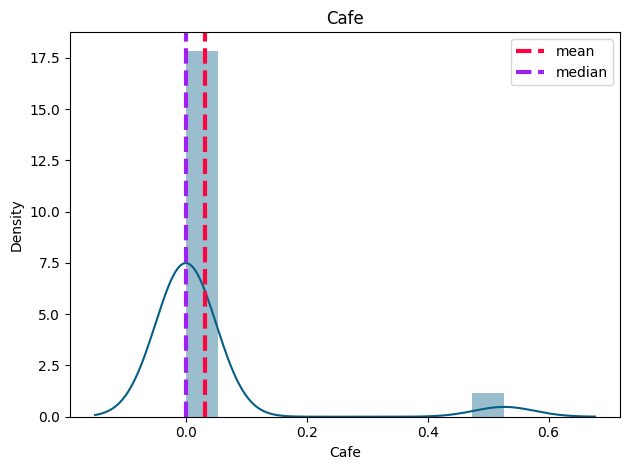

In [130]:
#  Transform Your data
for i,col in enumerate(['Cafe']) :
    sns.distplot(cluster_dummy[col], color = '#055E85');
    feature = cluster_dummy[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1))
    plt.title(f'{col.title()}');
    plt.tight_layout();


In [131]:
print(cluster_dummy.columns)


Index(['Restaurant', 'Cost', 'Total_Cuisine_Count', 'American', 'Andhra',
       'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger',
       'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food',
       'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream',
       'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese',
       'Mediterranean', 'Mexican', 'Modern Indian', 'Momos', 'Mughlai',
       'North Eastern', 'North Indian', 'Pizza', 'Salad', 'Seafood',
       'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')


### 6. Data Scaling

In [132]:
# Scaling your data
cluster_dummy.sample(5)

,Restaurant,Cost,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Goan,Healthy Food,Hyderabadi,Ice Cream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Mediterranean,Mexican,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
87,American Wild Wings,600,4,1,0,0,0,0,0,0,0,1,0.000000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8,Hyper Local,1000,5,1,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
86,The Chocolate Room,600,2,0,0,0,0,0,0,0,0,0,0.526589,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52,Biryanis And More,500,3,0,0,0,0,0,0,0,1,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
81,Delhi-39,600,2,0,0,0,0,0,0,0,0,0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
cluster_dummy.dtypes

Restaurant              object
Cost                     int64
Total_Cuisine_Count      int64
American                 int64
Andhra                   int64
Arabian                  int64
Asian                    int64
BBQ                      int64
Bakery                   int64
Beverages                int64
Biryani                  int64
Burger                   int64
Cafe                   float64
Chinese                  int64
Continental              int64
Desserts                 int64
European                 int64
Fast Food                int64
Finger Food              int64
Goan                     int64
Healthy Food             int64
Hyderabadi               int64
Ice Cream                int64
Indonesian               int64
Italian                  int64
Japanese                 int64
Juices                   int64
Kebab                    int64
Lebanese                 int64
Mediterranean            int64
Mexican                  int64
Modern Indian            int64
Momos   

In [135]:
#normalizing numerical columns
numerical_cols = ['Cafe']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

##### Which method have you used to scale you data and why?

I have used StandardScaler to removes the mean and scales each feature/variable to unit variance.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, it is important to use dimensionality reduction techniques as dataset has 40 or more features. This is because, as the number of features increases, the computational cost of clustering algorithms also increases. In addition, high dimensionality can lead to the "curse of dimensionality", where the data becomes sparse and the clusters become harder to identify. Dimensionality reduction techniques such as PCA, t-SNE, or LLE can help reduce the number of features while maintaining the important information in the data, making it easier to cluster and interpret the results.

In [136]:
# print sample dataset
scaled_df.sample()

,Restaurant,Cost,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,Biryani,Burger,Cafe,Chinese,Continental,Desserts,European,Fast Food,Finger Food,Goan,Healthy Food,Hyderabadi,Ice Cream,Indonesian,Italian,Japanese,Juices,Kebab,Lebanese,Mediterranean,Mexican,Modern Indian,Momos,Mughlai,North Eastern,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
19,Pakwaan Grand,400,3,0,0,0,0,0,0,0,1,0,-0.252646,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [137]:
from sklearn.decomposition import PCA

In [138]:
#applying pca to for the dimensionlty deduction

features = scaled_df.columns
features = features.drop('Restaurant')
# create an instance of PCA
pca = PCA()

# fit PCA on features
pca.fit(scaled_df[features])


PCA()

**In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.**

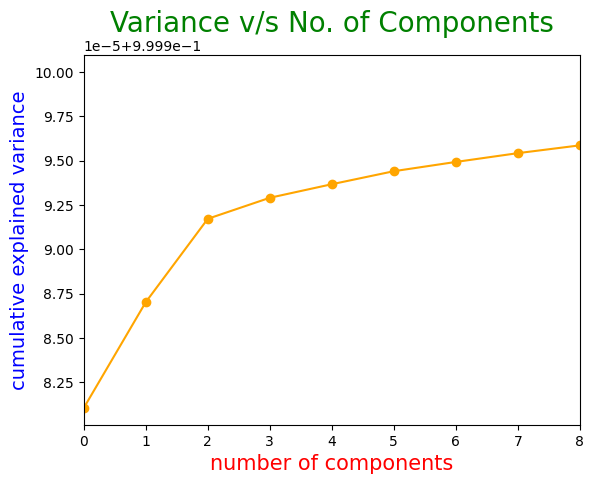

In [139]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()


In [140]:
#using n_component as 3
pca = PCA(n_components=3)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 3 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [9.99981048e-01 5.96720919e-06 4.69966853e-06]
Cumulative variance explained by 3 principal components: 100.00%


In [141]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)


original shape:  (100, 45)
transformed shape: (100, 3)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I have used PCA as dimension reduction technique, because PCA (Principal Component Analysis) is a widely used dimensionality reduction technique because it is able to identify patterns in the data that are responsible for the most variation. These patterns, known as principal components, are linear combinations of the original features that are uncorrelated with each other. By using the first few principal components, which account for the majority of the variation in the data, one can effectively reduce the dimensionality of the data while maintaining most of the important information.

Another advantage of PCA is that it is a linear technique, which means it can be applied to data that have a linear relationship between features. It is also easy to interpret the results as the principal components can be thought of as new, uncorrelated features. Additionally, PCA can be used for data visualization by projecting high-dimensional data onto a 2D or 3D space for easy visualization.

When PCA is applied before k-means, it is used to reduce the dimensionality of the data by transforming the original feature space into a new feature space of uncorrelated principal components. The k-means algorithm is then applied to the transformed data, resulting in clusters that are defined in the new feature space. The advantage of this approach is that it can help to remove noise and correlated features from the data, which can make the clustering results more interpretable. However, it also means that the clusters may be harder to interpret in the original feature space.

When PCA is applied after k-means, it is used to visualize the clusters in a lower-dimensional space. The k-means algorithm is applied to the original data, resulting in clusters that are defined in the original feature space. PCA is then used to project the data into a lower-dimensional space, making it easier to visualize and interpret the clusters. The advantage of this approach is that the clusters can be easily interpreted in the original feature space. However, it may not be as effective in removing noise and correlated features from the data.

### 8. Data Splitting

In [142]:
# Split your data to train and test. Choose Splitting ratio wisely.
#from text vectorization
try:
 X = X_tfidf
except KeyError:
 y = sentiment_df['Sentiment']

In [143]:
sentiment_df.shape

(9954, 5)

In [145]:
from sklearn.model_selection import train_test_split
import pandas as pd

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Convert y to a DataFrame if it's a Series
if isinstance(y, pd.Series):
    y = y.to_frame()


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Perform train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Describes info about train and test set
# print("Shape of X: ", X_train.shape[0])
print("Shape of y: ", y_train.shape[0])
print("Shape of X: ", X_test.shape[0])
print("Shape of y: ", y_test.shape[0])


Shape of X: (9954, 17327)
Shape of y: (10, 1)
Shape of X: (9954, 17327)
Shape of y: (10, 1)


##### What data splitting ratio have you used and why?

I have used 80:20 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Using class imbalance ratio (CIR) to measure data imbalance. The CIR is calculated as the ratio of the number of observations in the majority class (Nm) to the number of observations in the minority class (Nm). The CIR can be expressed as: CIR = Nm / Ns, where Nm is the number of observations in the majority class and Ns is the number of observations in the minority class.

In [147]:
#getting the value count for target class
vc = sentiment_df.sentiment.value_counts().reset_index().rename(columns = {'index':'Sentiment','Sentiment':'Count'})

In [ ]:
#defining majority and minority class value
majority_class = vc.Count[0]
minority_class = vc.Count[1]

In [ ]:
#calculating cir value for checking class imbalance
CIR = majority_class / minority_class
CIR

1.701654461621915

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have found that there is imbalance in dataset with 63: 37 ratio, where 63 is the majaority class and 37 is the minority class. Even the CIR score suggest that majority class is 1.73 times greater than minority class. However it is considered as slight imbalance, therefore not performing any under or over sampling technique i.e., not required to treat class imabalance.

## ***7. ML Model Implementation***

### ML Model - 1 K Mean Clustering

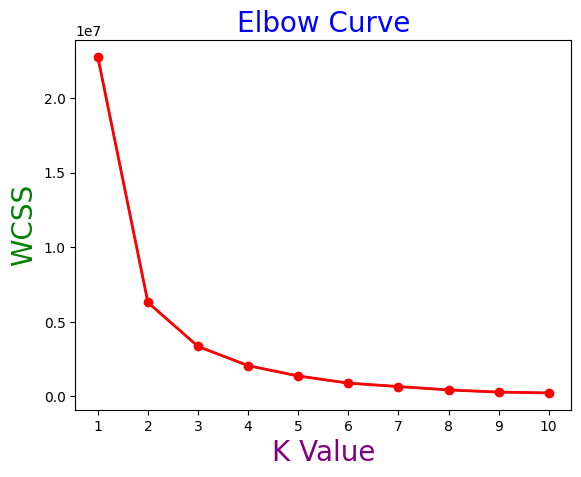

In [148]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans
# Fit the Algorithm
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)
# Predict on the model

# Elbow curve
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()


For n_clusters = 2 average silhouette_score is : 0.6496283422735044


TypeError: not all arguments converted during string formatting

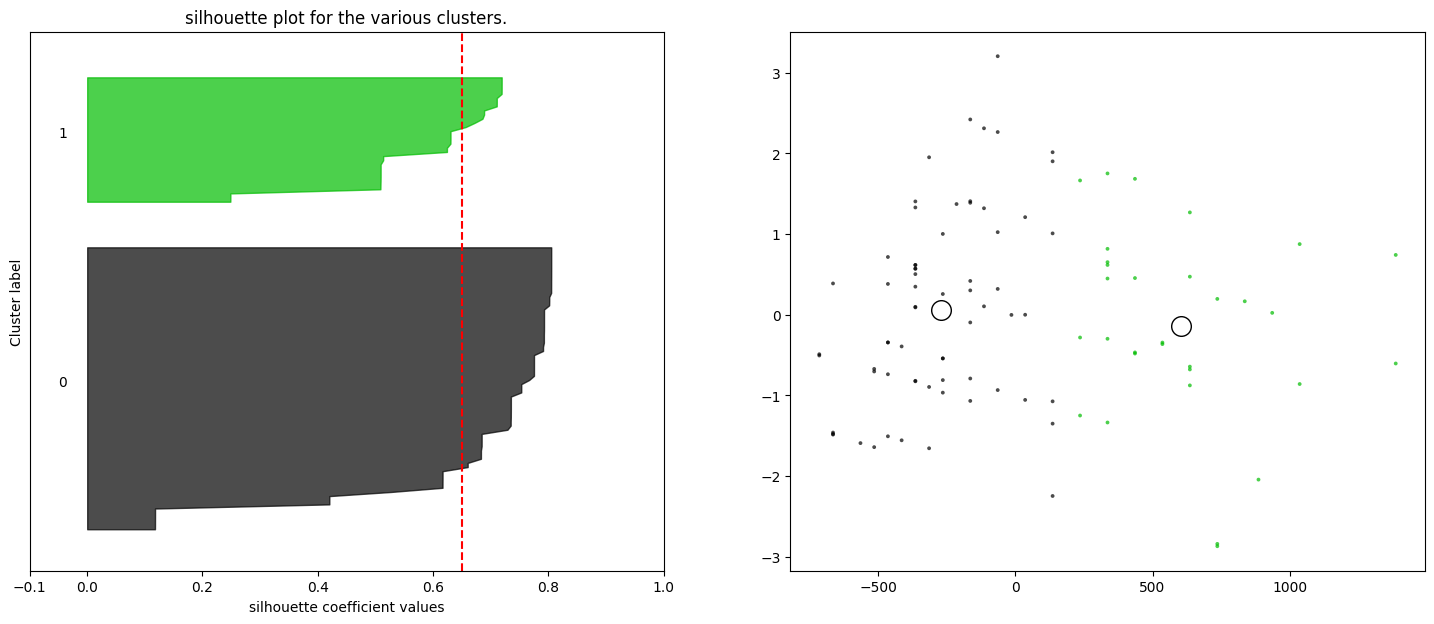

In [149]:
#silhouette score
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        # ax2.scatter(c[0], c[1], marker='' % i, alpha=1,
                    s=50, edgecolor='k')
# please run on jupyter notebook it is not work  in colab
    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

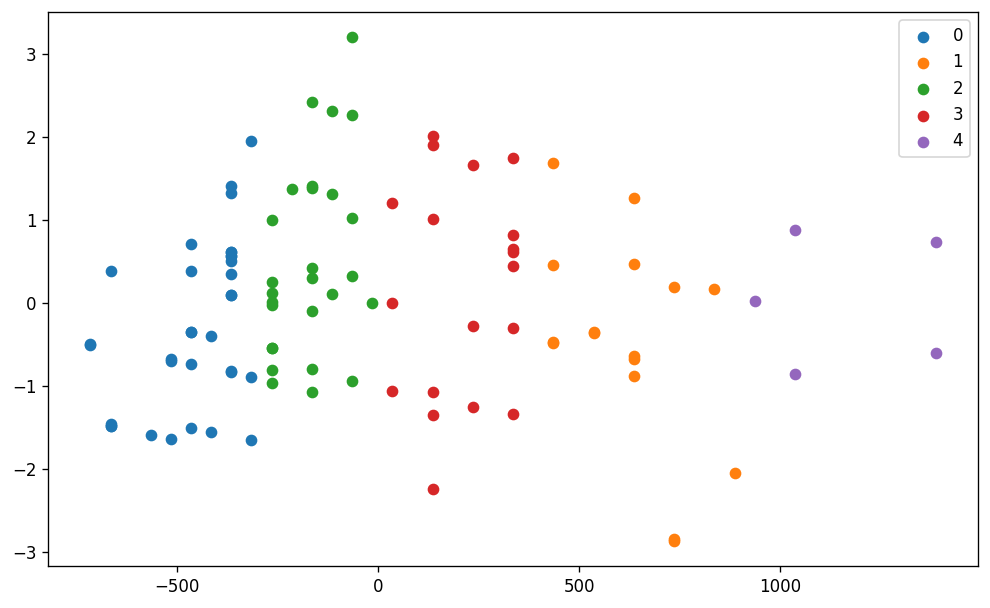

In [150]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

# ML Model - 1 Hierarchical Clustering
Hierarchical clustering is another unsupervised machine learning algorithm, which is used to group the unlabeled datasets into a cluster and also known as hierarchical cluster analysis or HCA.

In this algorithm, we develop the hierarchy of clusters in the form of a tree, and this tree-shaped structure is known as the dendrogram.

The hierarchical clustering technique has two approaches:

**Agglomerative :**

Agglomerative is a bottom-up approach, in which the algorithm starts with taking all data points as single clusters and merging them until one cluster is left.

**Divisive :**

Divisive algorithm is the reverse of the agglomerative algorithm as it is a top-down approach.

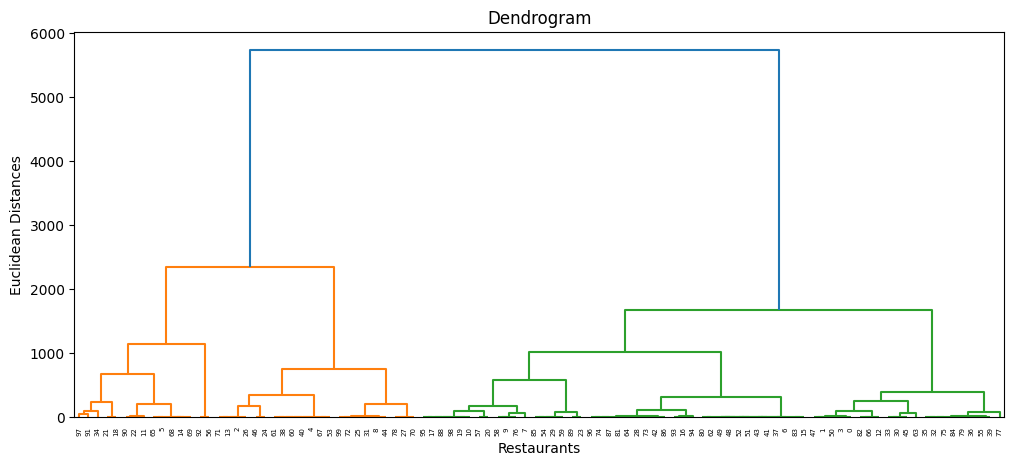

In [151]:
# Code to find hierarchial clustering and vizualizing dendograms

import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [152]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6466399745554484
For n_clusters = 3, silhouette score is 0.5916385996152044
For n_clusters = 4, silhouette score is 0.5283387631100331
For n_clusters = 5, silhouette score is 0.5407373266698352
For n_clusters = 6, silhouette score is 0.555947312749836
For n_clusters = 7, silhouette score is 0.560679630261542
For n_clusters = 8, silhouette score is 0.5791043711768313
For n_clusters = 9, silhouette score is 0.616158033860589
For n_clusters = 10, silhouette score is 0.6053905178004948
For n_clusters = 11, silhouette score is 0.6268891158473219
For n_clusters = 12, silhouette score is 0.6802420471732878
For n_clusters = 13, silhouette score is 0.7093355249500536
For n_clusters = 14, silhouette score is 0.7124723530154405
For n_clusters = 15, silhouette score is 0.7529073788698213


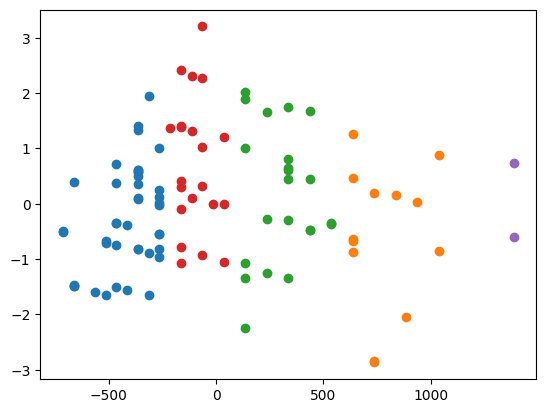

Silhouette Coefficient: 0.541
davies_bouldin_score 0.465


In [153]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

#### 2. Cross- Validation & Hyperparameter Tuning

In [154]:
# ML Model - 1 Implementation
#importing kmeans
from sklearn.cluster import KMeans

In [155]:
#Within Cluster Sum of Squared Errors(WCSS) for different values of k
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    wcss.append(km.inertia_)

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


**KMeans Clustering**

I applied K means Clustering to cluster the Restaurants based on the given features. I used both the Elbow and Silhuoette Methods to get an efficient number of K, and we discovered that n clusters = 6 was best for our model. The model was then fitted using K means, and each data point was labelled with the cluster to which it belonged using K means.labels. After labelling the clusters, we visualised them and counted the number of restaurants in each cluster, discovering that the majority of the restaurants belonged to the first cluster.

**Agglomerative Hierarchical Clustering**

I have used Hierarchial Clustering - Agglomerative Model to cluster the restaurants based on different features. This model uses a down-top approach to cluster the data. I have used Silhouette Coefficient Score and used clusters = 6 and then vizualized the clusters and the datapoints within it.

# ML Model - 3 Sentiment Analysis

Linear Discriminant analysis is one of the most popular dimensionality reduction techniques used for supervised classification problems in machine learning. It is also considered a pre-processing step for modeling differences in ML and applications of pattern classification.

In [156]:
#Import pyldavis to visualise
!pip install pyLDAvis
!pip install scikit-learn

!pip install pyLDAvis
import pyLDAvis
# import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.5 MB/s eta 0:00:00


In [157]:
#calculating silhouette score for n_component
from sklearn.metrics import silhouette_score
from sklearn.decomposition import LatentDirichletAllocation

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


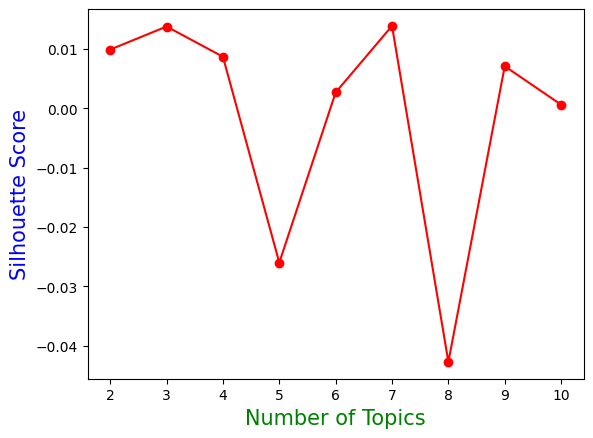

In [158]:
#plotting silhouette score
plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()

In [159]:
import nltk.corpus

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [160]:
# LDA model
lda = LatentDirichletAllocation(n_components=4)

lda.fit(X)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=4)

LDA is an unsupervised learning algorithm, it doesn't have any predefined labels. The labels are assigned based on the analysis done on the words, the weights of the words, and the context of the words in each topic.
So, the predicted topic is not a definite answer, therfore experimenting with different techniques like using supervised algorithm and combining the results to make a more accurate sentiment labeling.

##### Which hyperparameter optimization technique have you used and why?

I had  used GridSearchCV as the hyperparameter optimization technique as it uses all possible combinations of hyperparameters and provides the more accurate results. It then calculates the performance for each combination and selects the best value for the hyperparameters. This offers the most accurate tuning method

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used these metrices for evaluation of the model and their impact on business are as follows:

Accuracy: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

Precision : This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

Recall: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

F1 Score: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.




# 8. Future Work (Optional)

1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [ ]:
# Save the file

2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

The clustering technique was applied to group customers based on their review text, and it was found that the customers were grouped into two clusters: positive and negative. This provided a general understanding of customer satisfaction levels, with the positive cluster indicating the highest level of satisfaction and the negative cluster indicating the lowest level of satisfaction.

Sentiment analysis was then applied to classify the review text as positive or negative. This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback was achieved.

### ***Hurrah! Finally I have  successfully completed my Machine Learning Capstone Project !!!***